In [1]:
%%time
#data manipulation
import pandas as pd
import numpy as np

#visualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

Wall time: 1.84 s


In [2]:
%%time
df_titanic = pd.read_csv('dataset/Titanic/titanic.csv')
df_titanic.head(3)

Wall time: 19 ms


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
#check null value
df_titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
#Drop/ remove unnecessary features
df_titanic = df_titanic.drop(columns=['Cabin'])

In [6]:
#View Features and Data
print(
    f'The Number of available feature is: {df_titanic.shape[1]}, with the number of {str(df_titanic.shape[0])} observation.\nAnd the features are: {df_titanic.columns.to_list()}'
)

The Number of available feature is: 11, with the number of 1309 observation.
And the features are: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [7]:
#Data PreProcessing
df_titanic = df_titanic.interpolate(method='nearest', limit_direction='forward')
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            2
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
#now drop row that have null value
df_titanic = df_titanic.dropna()

In [9]:
df_titanic.isnull().sum().sum()

0

since we finish do the data cleaning. we can now proced preapre the data for Exloratory Data Analysis

---
# Exploratory Data Analysis
---

In [10]:
# Styling:
''' Use Pallete > 2 for jointplot or pair plot '''
custom_palet1 = ['#111d5e', '#1E6262', '#E50058', '#FF740F', '#F64662']
custom_palet2 = ['#11364A', '#E84545', '#3F7B70', '#ffbd69', '#ffc93c']
custom_palet3 = ['#11364A', '#E84545']
custom_palet4 = ['#3F7B70', '#F64662']
custom_palet5 = ["#868686", "#477ccd"]

plt.style.use('ggplot')

In [11]:
#check unique value for 
df_titanic.nunique()

PassengerId    1305
Survived          2
Pclass            3
Name           1303
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          927
Fare            280
Embarked          3
dtype: int64

In [12]:
#renaming columns for better understanding
df_titanic.columns = [
    'Passenger_ID', 'Survival_Status','Sosio_Class',
    'Name','Gender','Age','Sibling_Spouse_Relation',
    'PArent_Child_Relation','Ticket_Number','Fare','Port_Embarked']


In [13]:
# map data for better understanding
df_titanic['Survival_Status'] = df_titanic['Survival_Status'].map({0: 'Not_Survived', 1: 'Survived'})

df_titanic['Sosio_Class'] = df_titanic['Sosio_Class'].map({1: 'Upper_Class', 2: 'Middle_Class', 3: 'Lower_Class'})

df_titanic['Port_Embarked'] = df_titanic['Port_Embarked'].map({'C': 'Cherboug', 'Q': 'Queesntown', 'S':'Southhampton'})


In [14]:
# Group data by continuous or categorical dataset for better selection
categorical = [i for i in df_titanic.loc[:, df_titanic.nunique()<= 10]]
continuous = [i for i in df_titanic.loc[:, df_titanic.nunique()>=10]]

In [15]:
def cat_distribution(data, cols, hue=None, rows=3, columns=2):

    '''Function for displaying categorical Distribution'''

    fig, axes = plt.subplots(rows, columns, figsize=(15, 12))
    fig.patch.set_facecolor('#e8e8e6')
    axes = axes.flatten()

    for i, j in zip(data[cols].columns, axes):
        sns.countplot(x=i,
        data=data,
        palette=custom_palet2,
        hue=hue,
        ax=j,
        order=data[i].value_counts().index)

        j.tick_params(color='black')
        total = float(len(data[i]))
        j.set_title(f'Distribution of {str(i).capitalize()}')

        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2. , height+2, '{:1.2f}%'. format((height/ total)*100), ha = 'center')

        plt.style.use('seaborn-dark-palette')
        plt.tight_layout()


## Categorical Data

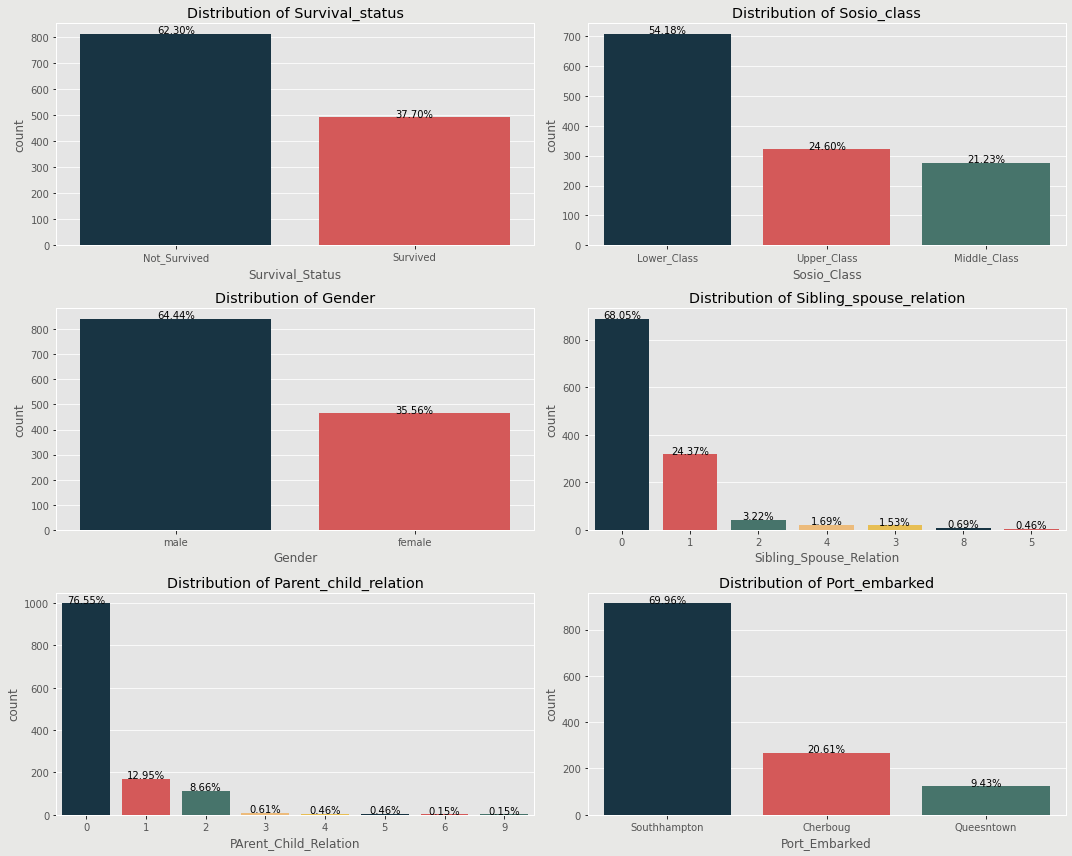

In [16]:
cat_distribution(df_titanic, categorical)

posx and posy should be finite values
posx and posy should be finite values


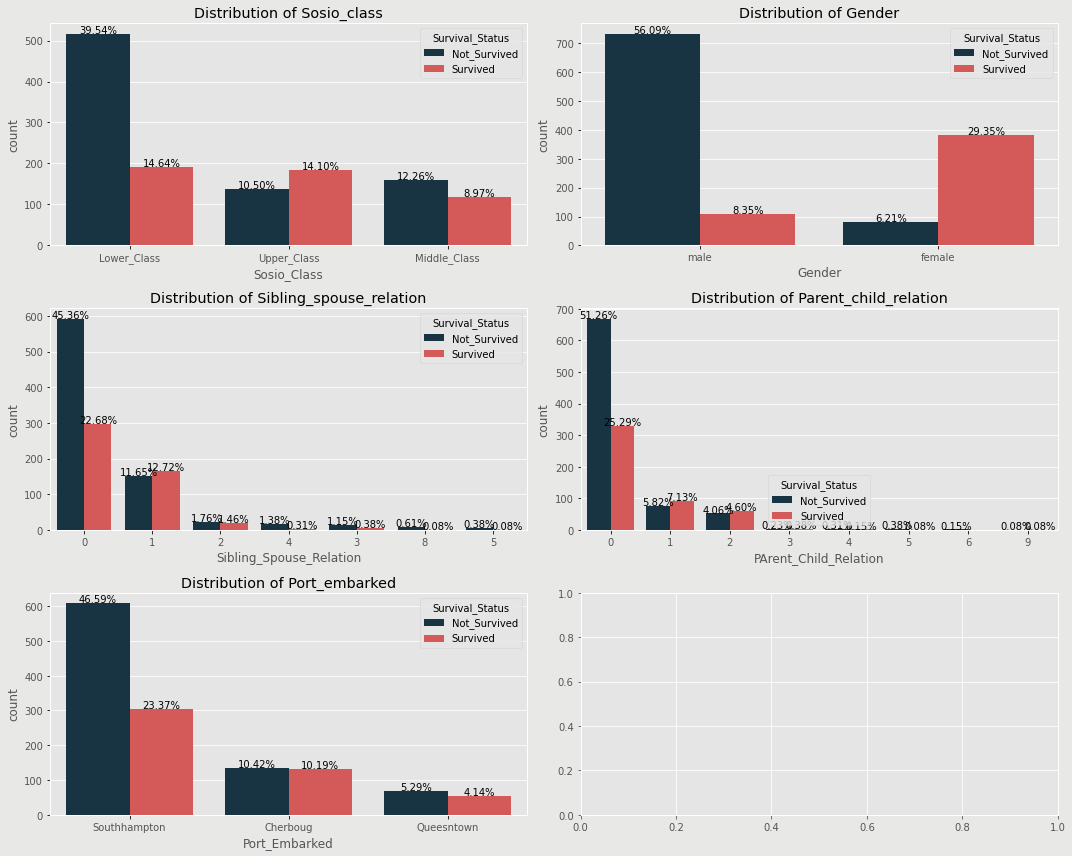

In [17]:
cat_distribution(df_titanic, categorical[1:], 'Survival_Status')

## Continuous Data

<AxesSubplot:title={'center':'Passenger Fare'}, xlabel='Fare'>

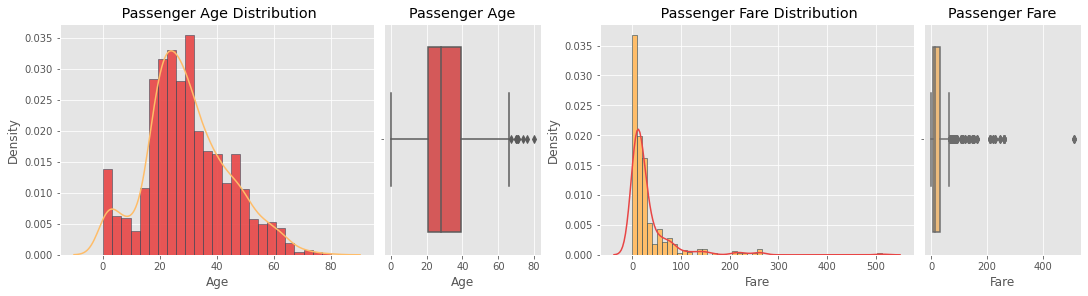

In [18]:
# Displaying continuous Data distributions:
fig = plt.figure(constrained_layout= True, figsize = (15,4))
grid = gridspec.GridSpec(ncols=6, nrows=1, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title(' Passenger Age Distribution')
sns.distplot(
    df_titanic['Age'],
    hist_kws ={
        'rwidth':1,
        'edgecolor': '#11364A',
        'alpha': 0.9},
    kde_kws={
        "linestyle":'solid',
        'color':custom_palet2[3]},
    color = custom_palet2[1]
        )
ax11 = fig.add_subplot(grid[0, 2:3])
ax11.set_title('Passenger Age')
sns.boxplot(df_titanic['Age'], orient='v', color= custom_palet2[1])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title(' Passenger Fare Distribution')
sns.distplot(
    df_titanic['Fare'],
    hist_kws ={
        'rwidth':1,
        'edgecolor': '#11364A',
        'alpha': 1},
    kde_kws={
        "linestyle":'solid',
        'color':custom_palet2[1]},
    color = custom_palet2[3]
        )
ax22 = fig.add_subplot(grid[0, 5:])
ax22.set_title('Passenger Fare')
sns.boxplot(df_titanic['Fare'], orient='any', color= custom_palet2[3])

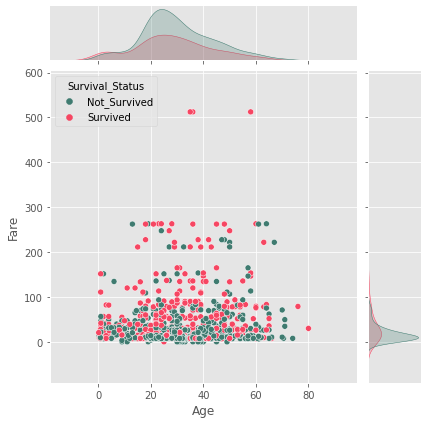

In [19]:
sns.jointplot(data=df_titanic, x="Age", y="Fare", hue="Survival_Status", palette=custom_palet4)

Okay, finished with the EDA. Now lets proceed with ML prediction Analysis

---
# ML Prediction Analysis
---

In [20]:
# import necesssary packages
# data preprocessing- splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# model build
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#result evaluation
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error


In [21]:
model_list = [
    SVC(),
    GaussianNB(),
    LinearRegression(),
    LogisticRegression(),
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(n_estimators=45)
]

In [22]:
# import data
data_train = pd.read_csv('dataset/Titanic/train.csv')

In [23]:
# need to do preprocessing again- but first lets check the data demography
print( f'The number of null value in train data :{ data_train.isnull().sum().sum()}')

The number of null value in train data :866


since the feature that I will be using is 'Age', 'Gender', 'Sosio_Class','Fare'  and 'Survival Status'. So I will make new dataset

In [24]:
newTrainData = pd.DataFrame( data_train, columns=['Age','Sex','Pclass','Fare','Survived'], index=None)
newTrainData.to_csv('dataset/Titanic/selectedTrain.csv', index= False)

In [25]:
train_df = pd.read_csv('dataset/Titanic/selectedTrain.csv')
# Rename the columsn for better understanding
train_df.columns =['Age', 'Gender', 'Sosio_Class', 'Fare','Survival_Status']

# Mapping the Gender columns for processing
train_df['Gender'] = train_df['Gender'].map({'male':0, 'female':1})

#lets see them!
train_df.head()

,Age,Gender,Sosio_Class,Fare,Survival_Status
0,22.0,0,3,7.2500,0
1,38.0,1,1,71.2833,1
2,26.0,1,3,7.9250,1
3,35.0,1,1,53.1000,1
4,35.0,0,3,8.0500,0


In [26]:
#lets check for any null value
print( f'The number of null value in train data :{ train_df.isnull().sum().sum()}')

The number of null value in train data :177


In [27]:
# use iterlopate() for handling the null value
train_df = train_df.interpolate(method='linear', limit_direction='forward' )
print( f'The number of null value in train data after interpolate() :{ train_df.isnull().sum().sum()}')

The number of null value in train data after interpolate() :0


In [88]:
dataset = train_df.values
feature, target = dataset[:,0:-1], dataset [:, -1]

In [87]:
feature

array([[22.    ,  0.    ,  3.    ,  7.25  ],
       [38.    ,  1.    ,  1.    , 71.2833],
       [26.    ,  1.    ,  3.    ,  7.925 ],
       ...,
       [22.5   ,  1.    ,  3.    , 23.45  ],
       [26.    ,  0.    ,  1.    , 30.    ],
       [32.    ,  0.    ,  3.    ,  7.75  ]])

In [29]:
x_train,x_test, y_train, y_test = train_test_split(feature, target, random_state=48, test_size=0.3)

In [30]:
def thresholding(y_pred):
        
    ''' This method will transform The continuous list into discrete 0 and 1 based on the mean value '''

    data = np.array(y_pred)
    mean = data.mean()
    new_pred = []
    for y in data:
        if y >= mean:
            y = 1
            new_pred.append(y)
        elif y < mean:
            y = 0
            new_pred.append(y)
            
    return new_pred


def get_Score(model_list, x_train, x_test, y_train, y_test):
    result = []
    for model in model_list:
        model.fit(x_train,y_train)
        gen_score = model.score(x_test,y_test)
        y_pred = thresholding(model.predict(x_test))
        
        score_r2 = r2_score(y_test,y_pred)
        mae_score = mean_absolute_error(y_test,y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score = auc(fpr,tpr)
        score_f1 = f1_score(y_test, y_pred)
        score_jaccard = jaccard_score(y_test, y_pred)
        
        result.append([str(model),gen_score,score_r2,mae_score, auc_score, score_f1,score_jaccard])
        
    return result

In [31]:
evaluationTable =pd.DataFrame(get_Score(model_list, x_train, x_test, y_train, y_test), \
 columns=['Model', 'Score', 'R2_Score','MAE_Score','AUC_Score','F1_Score','Jaccard Similarity'])
evaluationTable

,Model,Score,R2_Score,MAE_Score,AUC_Score,F1_Score,Jaccard Similarity
0,SVC(),0.675373,-0.382344,0.324627,0.596698,0.391608,0.243478
1,GaussianNB(),0.764925,-0.001008,0.235075,0.760509,0.704225,0.543478
2,LinearRegression(),0.358788,-0.001008,0.235075,0.760509,0.704225,0.543478
3,LogisticRegression(),0.768657,0.014881,0.231343,0.755677,0.696078,0.533835
4,DecisionTreeClassifier(class_weight='balanced'),0.768657,0.014881,0.231343,0.767416,0.712963,0.553957
5,RandomForestClassifier(n_estimators=45),0.787313,0.094326,0.212687,0.776516,0.721951,0.564885


In [32]:
# initialize K-Fold
NSPLIT = 5
kf = KFold(n_splits=NSPLIT, random_state=48, shuffle=True)

In [33]:
def get_Score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)


In [34]:
def get_KFold_Score(model_list, feature):
    output = [[model] + [get_Score(model, feature[train_index], feature[test_index], target[train_index], target[test_index]) for train_index, test_index in kf.split(feature)] for model in model_list]

    return output

In [35]:
KFold_Score = pd.DataFrame(get_KFold_Score(model_list,feature), columns= ['Model', 'iter1', 'iter2', 'iter3', 'iter4', 'iter5'])

In [36]:
for i, row in KFold_Score.iterrows():
    KFold_Score.loc[i, 'Average Score'] = (row['iter1']+row['iter2']+row['iter3']+row['iter4']+row['iter5'])/NSPLIT

KFold_Score.head()

,Model,iter1,iter2,iter3,iter4,iter5,Average Score
0,SVC(),0.681564,0.702247,0.668539,0.640449,0.679775,0.674515
1,GaussianNB(),0.765363,0.780899,0.797753,0.780899,0.758427,0.776668
2,LinearRegression(),0.350068,0.359321,0.459439,0.375489,0.264338,0.361731
3,LogisticRegression(),0.765363,0.786517,0.808989,0.797753,0.747191,0.781163
4,DecisionTreeClassifier(class_weight='balanced'),0.748603,0.837079,0.820225,0.803371,0.786517,0.799159


## Here I will continue with the use of pipeline
---

So what I'm going to do:
1. get the dataset
2. Split the data<- Already done because the data already split>
3. Build the Pipeline:
    * 1- Scaling the data using StandardScaler method
    * 2- Reduce th Dimension  using PCA
    * 3- Aply Classifier
4. Then I will test the tested model and find out the best model


In [37]:
#import necessary pacakages which not imported before
from sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


In [89]:
#Get the Train dataset
X_Train = feature.copy()
Y_Train = target.copy()

In [90]:
# get and prepare the test data
X_Test = pd.read_csv('dataset/Titanic/test.csv', usecols=['Age','Sex','Pclass','Fare'])
Y_Test = pd.read_csv('dataset/Titanic/gender_submission.csv', usecols=['Survived'])

In [91]:
# Rename the column for better understanding
X_Test.columns =['Sosio_Class', 'Gender', 'Age', 'Fare']
Y_Test.columns =['Survival_Status']

In [92]:
#Preview X dataset
X_Test.head()

,Sosio_Class,Gender,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [93]:
# Mapping the Gender columns for processing
X_Test['Gender'] = X_Test['Gender'].map({'male':0, 'female':1})

In [94]:
#lets check for any null value
print( f'The number of null value in test data :\n{ X_Test.isnull().sum()}')
print( f'The number of null value in target test data :\n{ Y_Test.isnull().sum()}')

The number of null value in test data :
Sosio_Class     0
Gender          0
Age            86
Fare            1
dtype: int64
The number of null value in target test data :
Survival_Status    0
dtype: int64


In [95]:

# use iterlopate() for handling the null value
X_Test = X_Test.interpolate(method='pad', limit=5 )
print( f'The number of null value in test data after interpolate() :\n{ X_Test.isnull().sum()}')

The number of null value in test data after interpolate() :
Sosio_Class    0
Gender         0
Age            0
Fare           0
dtype: int64


In [96]:
X_Test = X_Test.values
Y_Test = Y_Test.values

## Build Pipeline

In [109]:
logR_pipe = Pipeline(
    [('scalar1',StandardScaler()),
    ('pca1', PCA(n_components=2)),
    ('logR_Classifier', LogisticRegression(random_state=0))])

In [111]:
tree_pipe = Pipeline([('tree_Classifier', DecisionTreeClassifier())])

In [112]:
forest_pipe = Pipeline(
    [('scalar3',StandardScaler()),
    ('pca3', PCA(n_components=2)),
    ('forest_Classifier', RandomForestClassifier(n_estimators=45))])

In [113]:
# make list of our pipelines
pipelines = [logR_pipe, tree_pipe, forest_pipe]

In [114]:
# initialize evaluation variable
best_accuracy = 0.0
best_classifier =0
best_pipeline =''

In [115]:
# map the classifier for better understandng
pipe_dict = {0: ' Logistic Regression', 1: 'Decision Tree Classifier', 2: 'Random Forest Classifier'}

In [116]:
#fit our pipeline
for pipe in pipelines:
    pipe.fit(X_Train, Y_Train)

In [117]:
for idx, model in enumerate(pipelines):
    print('{} Test Accuracy: {}'.format(pipe_dict[idx], model.score(X_Test, Y_Test)))

 Logistic Regression Test Accuracy: 0.6483253588516746
Decision Tree Classifier Test Accuracy: 0.4019138755980861
Random Forest Classifier Test Accuracy: 0.38516746411483255


In [108]:
for idx, model in enumerate(pipelines):
    if model.score(X_Test, Y_Test)> best_accuracy:
        best_accuracy = model.score(X_Test, Y_Test)
        best_pipeline= model
        best_classifier = idx

print(' Classifier with best Accuracy is: {}'.format(pipe_dict[best_classifier]))

 Classifier with best Accuracy is:  Logistic Regression
